# WEB SCRAPING - Assignment 3

In [60]:
import tweepy
import datetime
import numpy as np
import pandas as pd
from pandas import Series
from pprint import pprint
from pandas import DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib.dates as mdates

## 1) 10 points

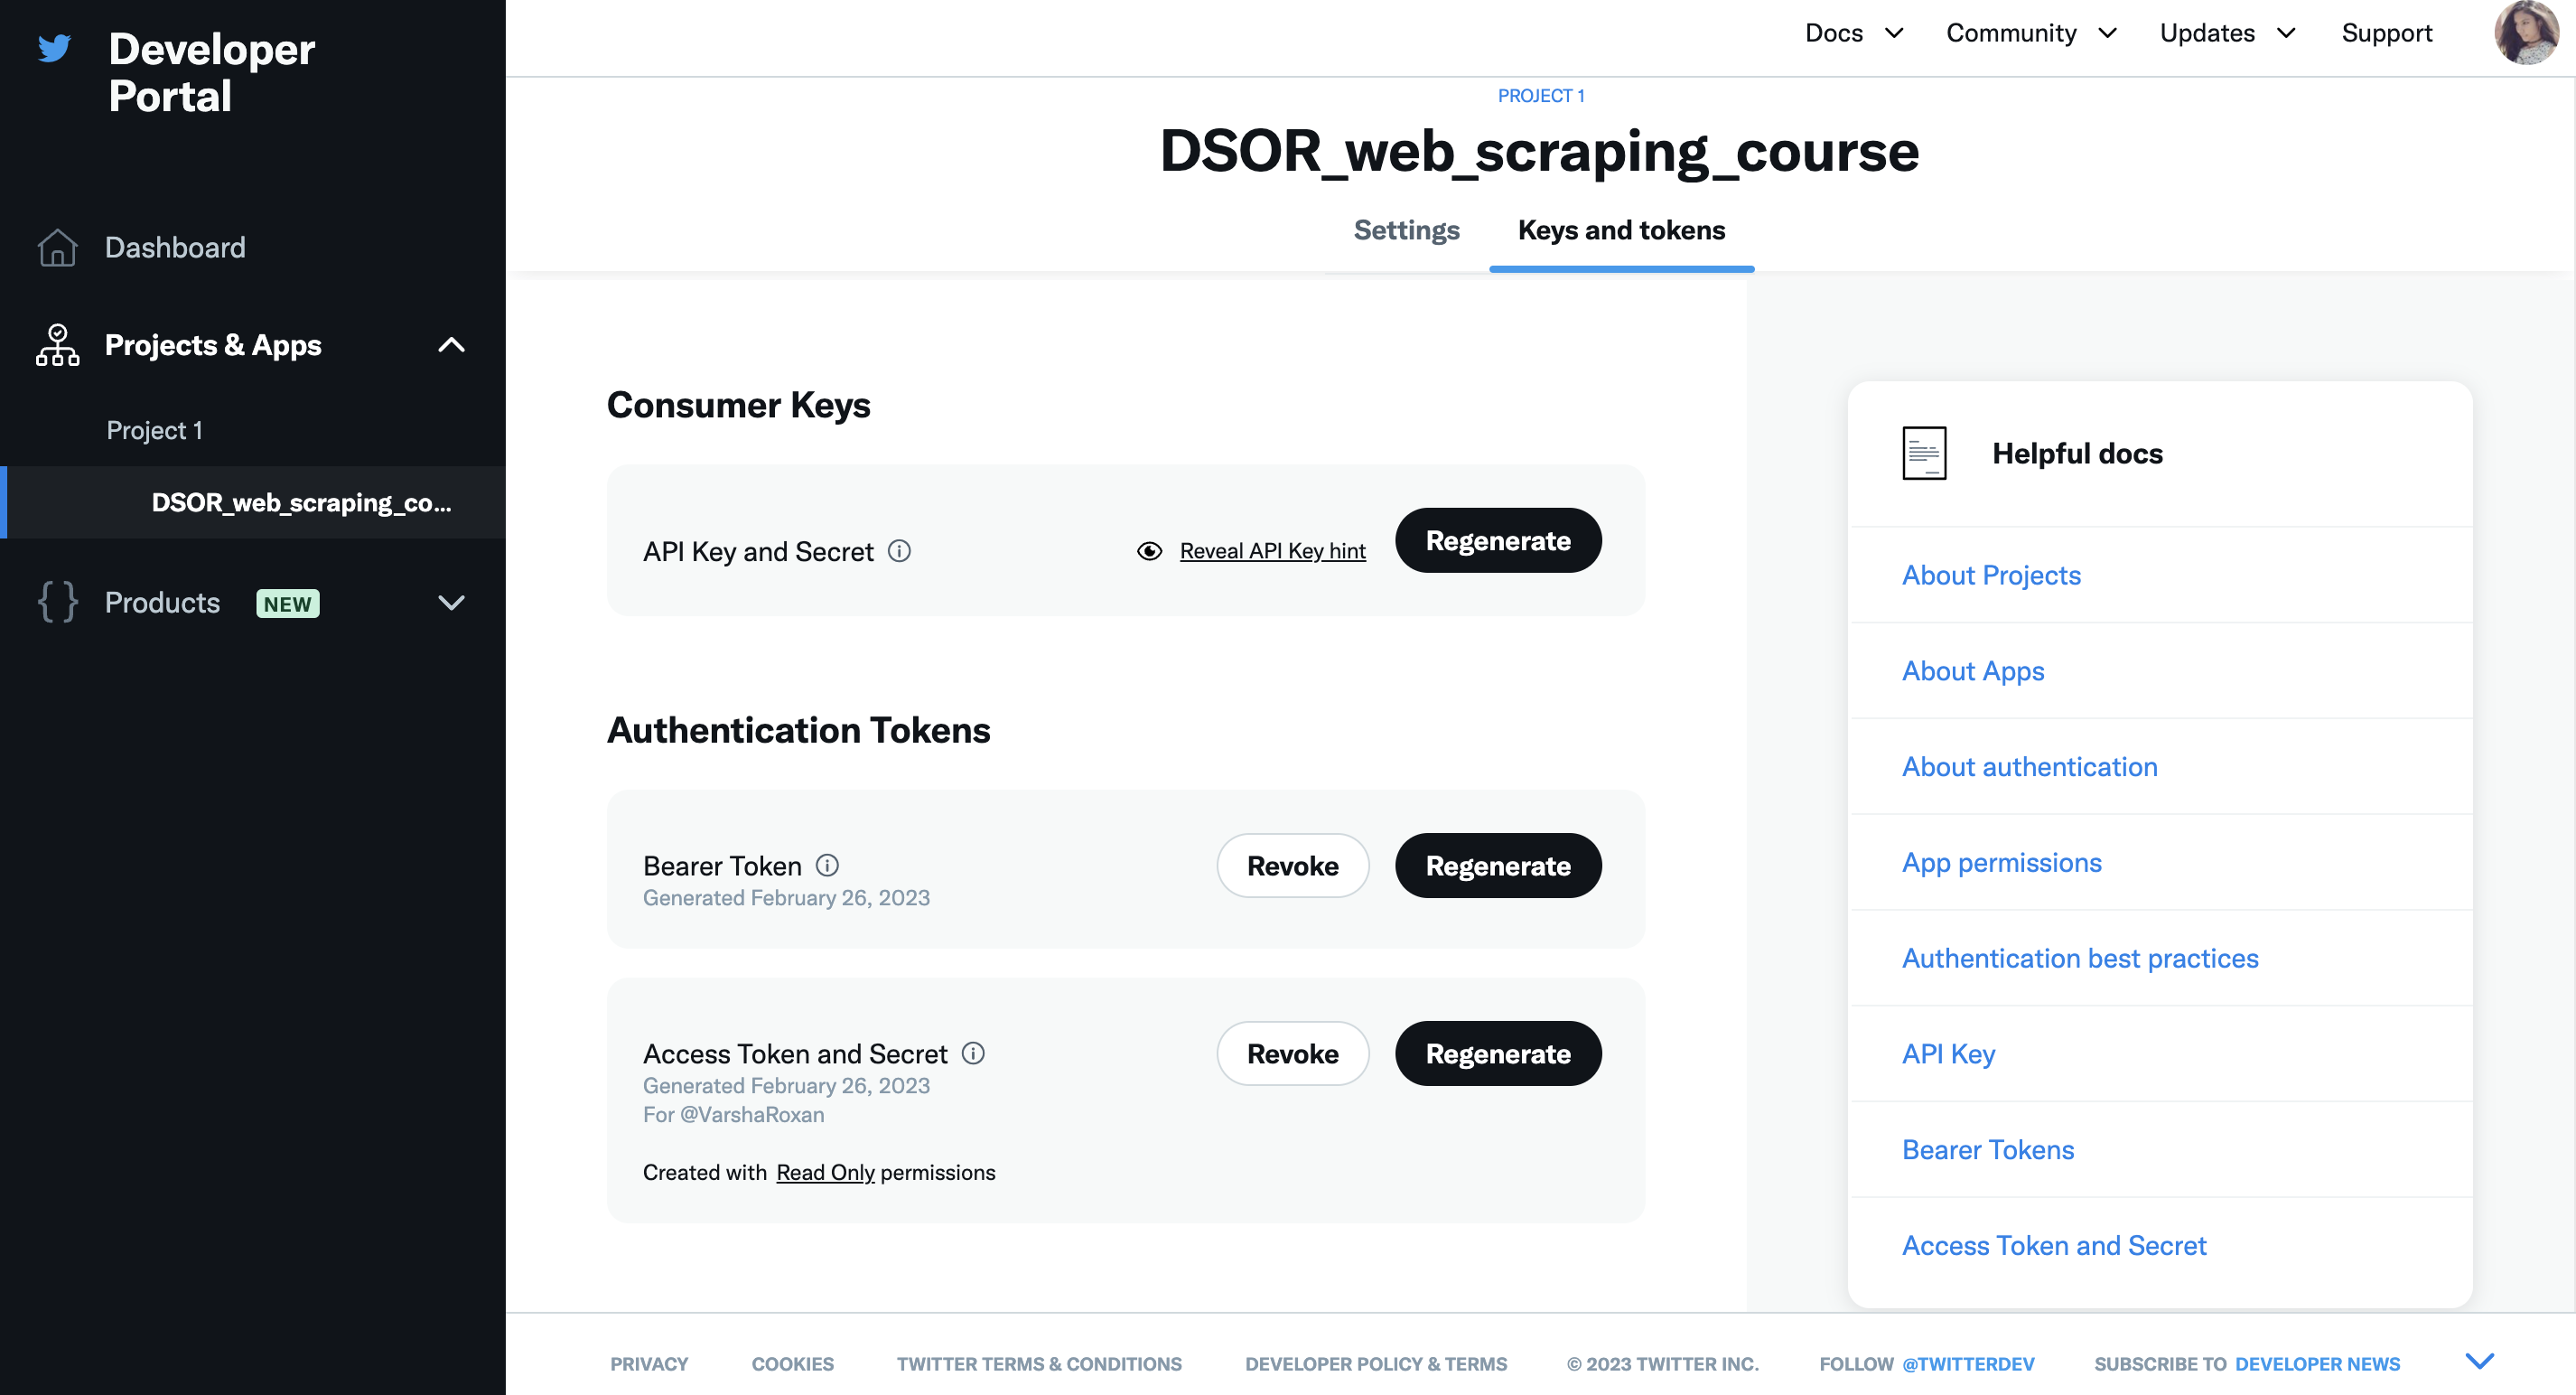

In [2]:
# My Twitter developer account details
# api_key = "CC1Ob0JzVkTKMjtgardSNP4In"
# api_key_secret = "zDIaWQWfebWE9Wsi3VapBO62UgYtZ2hMWjZutGhXjt3TX4qaJz"
# bearer_token = "AAAAAAAAAAAAAAAAAAAAAMOfYAEAAAAAvy9V%2FUiBxGaYi6bbdcVBUnKldZk%3DTpmtg5vdfSdCYFUAis7cBbNzwgT3weYBwTWWOawA7XDt2zd9JP"
# access_token = "1082519064881246208-tNKCDTe2b7VJl8oc5OuQPiRMiBRnlj"
# access_token_secret = "ETNad5yVzCCIxTGkYngUfZROb2cFbHLbuZXQ8rnygD60E"

# Use of the Twitter developer account details given for the course
api_key ="7YSxUteYWORpCV3YvlwVqXvAB"
api_key_secret = "znK2iU94y1kH93SI3NOcDwFY4RyYcbcoIt50seH2PmpGGOzTsE"
access_token = "1411076834012418051-bLma7hywtIq8LnY1wvWZGao4lIKcVf"
access_token_secret = "3fkXkiQZlIIS59mUIgM8xj29orgivWE0TfU1wgVhF1wPe"

authorization = tweepy.OAuthHandler(api_key, api_key_secret)
authorization.set_access_token(access_token, access_token_secret)
api = tweepy.API(authorization, wait_on_rate_limit=True)

# Screenshot of my Twitter developer account page
Image(filename='/Users/varsha/Desktop/Sem 4/Web scraping/Assignment 3/Twitter developer account.png') 

## 2) 60 points

### A (10 points)

In [47]:
"""
______________IMPORTANT NOTE______________: 

Due to restricted access of my developer account, I am using the account provided for students in this course
The professor mentioned on inscribe that 10,000 tweets are good enough for this assignment.
If I try more to set a very high limit, it is throwing limitation and sleep errors.
Therefore, I will be extracting 10,000 tweets searching for tweets related to #MahsaAmini.
Then, I am iterating through the tweets and counting how many #MahsaAmini tweets were successfully 
scraped from the extraction procedure.

"""

# Extracting tweets related to the term "#MahsaAmini"
tweets = tweepy.Cursor(api.search_tweets, q = '#MahsaAmini', tweet_mode='extended', count=100).items(10000)

In [48]:
tweets.next()

Status(_api=<tweepy.api.API object at 0x7fe523eb0550>, _json={'created_at': 'Mon Feb 27 03:37:35 +0000 2023', 'id': 1630049478865563650, 'id_str': '1630049478865563650', 'full_text': 'RT @AmirkhizyMeliss: We urge all countries at the U.N. Human Rights Council’s 2023 opening session Tomorrow to walk out on Iran’s foreign m…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'AmirkhizyMeliss', 'name': 'Amirkhizy', 'id': 1458778569912561668, 'id_str': '1458778569912561668', 'indices': [3, 19]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1577101506221903873, 'id_str': '1577101506221903873', 'name': 'arezoo 

In [6]:
# Counting the number of tweets succesfully retrieved with the 
count = 0
for i in tweets:
    count+=1
count

10000


### B (20 points)

In [11]:
"""
______________IMPORTANT NOTE______________: 

Due to resourse limitations and restrictions, I am able to access the time data for a very short span
that is taken from the 10,000 tweets extracted as permitted by the professor.

"""

# Extracting time stamp data from tweets
date = []

for i in tweets:
    date.append(i.created_at)

In [63]:
# Converting time stamp list to data frame
df = pd.DataFrame(columns=['created_at'])
df['created_at'] = date
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df.head()

,created_at
0,2023-02-26 21:18:20+00:00
1,2023-02-26 21:18:17+00:00
2,2023-02-26 21:18:15+00:00
3,2023-02-26 21:18:14+00:00
4,2023-02-26 21:18:13+00:00


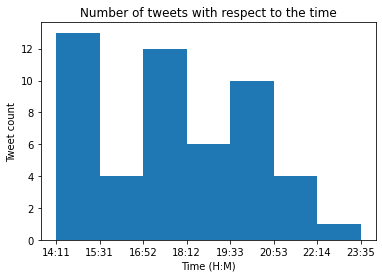

In [68]:
# Coverting time stamp to list of strings containing hours, minutes and seconds
time = []
for i in timestamp:
    t = i.strftime("%H:%M:%S")
    time.append(t)

# Visualizing the time series
conv_time = [datetime.strptime(i, "%H:%M:%S") for i in time]
bin_nr = 7
fig, ax = plt.subplots(1,1)
_counts, bins, _patches = ax.hist(conv_time, bins = bin_nr)
plt.xticks(bins)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.xlabel('Time (H:M)')
plt.ylabel('Tweet count')
plt.title('Number of tweets with respect to the time')
plt.show()

### C (10 points)

In [49]:
# Extracting and printing only the English language tweets related to this term
english_tweets = []
for i in tweets:
    if i.lang == 'en':
        english_tweets.append(i.full_text)
        
print(len(english_tweets))
print()
english_tweets

5987



['RT @SySyy90s: The deputy minister of health has confirmed chemical poisoning spreading in girl high schools are all intentional.Taliban has…',
 'RT @ybensnkr88: February 27 at the Human Rights Council, members should leave the room when IR Foreign Minister @Amirabdolahian speaks. No…',
 'RT @AmirkhizyMeliss: We urge all countries at the U.N. Human Rights Council’s 2023 opening session Tomorrow to walk out on Iran’s foreign m…',
 'RT @AzadiRojan: Please be #ToomajSalehi voice \n@Drake\n@anthonypadilla \n@kendricklamar \n@wizkhalifa\n@blackyspeakz\n@1future\n#IRGCterrorists\n#…',
 'RT @emilykschrader: IRI FM @Amirabdolahian will speak @UN_HRC on 27 Feb. He represents a government that has murdered 500+ civilians, incl.…',
 '@UkraizyCanadian @90DayFiance Follow #WomenLifeFreedom or #MahsaAmini,  #IRGCterrorists and #WalkoutIRI and you will find them.\nJust like any other religion, the majority are just born into it.\nMany women in Egypt do not follow these rules. I think this is a 90 Da

### D (10 points)

In [18]:
# Extracting and printing 10 recent tweets about this hashtag
tweets = tweepy.Cursor(api.search_tweets, q = '#MahsaAmini', tweet_mode='extended', count=100).items(10)

recent_tweets = []
for i in tweets:
    recent_tweets.append(i.full_text)
    
print (len(recent_tweets))
recent_tweets

10


['RT @TheDrIman: World leaders, stand together in solidarity with the people of Iran who have suffered from human rights violations\nHold I.R.…',
 'RT @emilykschrader: The Iranian people have made their views clear: \n\n#IranRevoIution #MahsaAmini #IRGCterorrists https://t.co/qxnNW6T3i9',
 '@zhrwmph دو\n\n#WalkoutIRI \n#MahsaAmini',
 'RT @Nedaamj2006: @Action4IR @AlirezaAkhondi @SafaiDarya @AbirAlsahlani @_AliEbrahimzade @samrajabii @roozbehmon @khiyar_shoor @james_bidin…',
 'RT @chalbulor: فراخوان سراسری یکشنبه ۷ اسفند\n#MahsaAmini \n#اعتراضات_سراسری \n#WomanLifeFreedom https://t.co/vExeFHxvmG',
 'RT @sinavaliollah: طالبان هم با مسمومیت عمدی جلوی تحصیل دختران رو نگرفت. کل کل انداختین با هم؟!\n#زن_زندگی_آزادی\n#MahsaAmini',
 'RT @chalbulor: یزد عمامه پرانی یکشنبه ۷ اسفند \n#MahsaAmini \n#اعتراضات_سراسری \n#WomanLifeFreedom https://t.co/ThqfjYnBuF',
 'RT @AmirkhizyMeliss: We urge all countries at the U.N. Human Rights Council’s 2023 opening session Tomorrow to walk out on Iran’s foreign

### E (10 points)

In [17]:
# Creating a list that contains 50 user account ID that tweets this term
tweets = tweepy.Cursor(api.search_tweets, q = '#MahsaAmini', tweet_mode='extended', count=100).items(100)

accounts = set()
for i in tweets:
    accounts.add(i._json['user']['screen_name'])
    if len(accounts) >= 50:
        break
print (len(accounts))
list(accounts)

50


['TangYaowalak',
 '3040ariyo',
 'mashdimamdali',
 'MonsieurLeRiz',
 'Cruella1127_',
 'Parebelllum',
 'HadrienPean',
 'Mit21859080',
 'UnityRace',
 'Scopiwild',
 'rollingstoneram',
 'rez4877',
 'Farhadca',
 'moxi3ann',
 'MedFacts101',
 'alimzofficial',
 'ashimashi1401',
 'Alic98210073',
 'Roterhut1',
 'nafise86',
 'fuckoffbasiji',
 'azar_shad',
 'Pedro05140722',
 'am70561791',
 'BananMilkJK',
 'SoolyIrani',
 'Parsturk6',
 'bmz43',
 'danoshch',
 'mrspock1975',
 'Sep_h_r',
 'nsns09209749',
 'payande_irann',
 'Lia01184674',
 'Goli36673609',
 'saber_tabrizi',
 'itsablackrain',
 'Shohreh11565777',
 'Moonlightofiran',
 'manijeh_rabiei',
 'BarayeFreedom',
 'HeSepi',
 'Naser_n2_1985',
 'Goshegir1',
 'girl36_saba',
 'azadehnourani',
 'Tahmine_iirani',
 'Lhnia2',
 'elyaszkg',
 'sayeh84912']

## 3) 30 points

### A  (20 points)

In [12]:
# Getting tweets from Indiana University Twitter account
user = 'IndianaUniv'
tweets = api.user_timeline(screen_name = user, count=50, tweet_mode='extended')
tweets

[Status(_api=<tweepy.api.API object at 0x7fe523eb0550>, _json={'created_at': 'Sun Feb 26 20:35:00 +0000 2023', 'id': 1629943133898244097, 'id_str': '1629943133898244097', 'full_text': "RT @IUMedSchool: Lester Thompson, MD, recorded his time at IU in the early '60s in his journals, including his aspirations, successes and a…", 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'IUMedSchool', 'name': 'IU School of Medicine', 'id': 31742031, 'id_str': '31742031', 'indices': [3, 15]}], 'urls': []}, 'source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 100367386, 'id_str': '100367386', 'name': 'Indiana University', 'screen_name': 'IndianaUniv', 'location': 'Indiana', 'description': 'Established in 1820, Indiana Un

In [13]:
# Getting "Tweet" and "Time" data
timestamp = []
text = []
time = []

for i in tweets:
    timestamp.append(i.created_at)
    text.append(i.full_text)
for i in timestamp:
    time.append(i.time())

In [14]:
# Creating "Tweet" and "Time" columns of the dataframe with only time data
data_frame = pd.DataFrame(columns = ['Tweet','Time'])
data_frame['Tweet'] = text
data_frame['Time'] = time
data_frame.head()

,Tweet,Time
0,"RT @IUMedSchool: Lester Thompson, MD, recorded...",20:35:00
1,IU announced on June 6 an agreement to support...,17:23:05
2,RT @IUImpact: IU researchers are addressing he...,19:35:00
3,"Since its creation in 1953, 254 IU faculty mem...",17:43:00
4,RT @IUImpact: IU's @BernicePescoso1 comments o...,14:29:00


In [15]:
# Creating "Tweet" and "Time" columns of the dataframe with the whole timestamp (date + time)
data_frame = pd.DataFrame(columns = ['Tweet','Time'])
data_frame['Tweet'] = text
data_frame['Time'] = timestamp
data_frame.head()

,Tweet,Time
0,"RT @IUMedSchool: Lester Thompson, MD, recorded...",2023-02-26 20:35:00+00:00
1,IU announced on June 6 an agreement to support...,2023-02-26 17:23:05+00:00
2,RT @IUImpact: IU researchers are addressing he...,2023-02-25 19:35:00+00:00
3,"Since its creation in 1953, 254 IU faculty mem...",2023-02-25 17:43:00+00:00
4,RT @IUImpact: IU's @BernicePescoso1 comments o...,2023-02-25 14:29:00+00:00


### B (10 points)

In [16]:
# Let us consider the tweet + timestamp dataframe for this sub-question
# Saving dataframe to csv file and displaying the csv file content
data_frame.to_csv("Indiana_University_Tweets.csv")
data = pd.read_csv("Indiana_University_Tweets.csv", index_col=0)
data.index+=1
data

,Tweet,Time
1,"RT @IUMedSchool: Lester Thompson, MD, recorded...",2023-02-26 20:35:00+00:00
2,IU announced on June 6 an agreement to support...,2023-02-26 17:23:05+00:00
3,RT @IUImpact: IU researchers are addressing he...,2023-02-25 19:35:00+00:00
4,"Since its creation in 1953, 254 IU faculty mem...",2023-02-25 17:43:00+00:00
5,RT @IUImpact: IU's @BernicePescoso1 comments o...,2023-02-25 14:29:00+00:00
6,RT @IUFoundation: IU’s Black Film Center &amp;...,2023-02-24 20:20:00+00:00
7,"RT @IUMedSchool: In her new role, Chemen Neal,...",2023-02-24 19:12:00+00:00
8,In the year since Russia invaded Ukraine on Fe...,2023-02-24 17:09:01+00:00
9,"RT @global_iu: After one year of conflict, IU ...",2023-02-24 16:32:05+00:00
10,"A $2.6 million Explore, Engage, and Experience...",2023-02-24 15:00:16+00:00
